**Step 1: Understanding in Simple Words**

Imagine **100 prison cells** (numbered 1 to 100).

At the start, **all are closed **(protesters are locked inside).

Then **100 MLAs** (also numbered 1 to 100) take turns:

MLA 1 toggles (opens/closes) **every cell** (because every number is divisible by 1).

MLA 2 toggles every **2nd cell** (2, 4, 6, …).

MLA 3 toggles every **3rd cell** (3, 6, 9, …).

… and so on, until MLA 100 toggles only cell 100.

**Key Rule:**

If a cell is **closed**, the MLA opens it.

If a cell is **open**, the MLA closes it.

**Step 2: What Happens?**

A cell will be toggled **once for every divisor it has**.

Example: Cell 12 → divisors are (1, 2, 3, 4, 6, 12). That’s 6 actions.

If a cell has an **odd number of divisors**, it ends up open.

If a cell has an **even number of divisors**, it ends up closed.

👉 **Only perfect squares **(1, 4, 9, 16, …, 100) have an odd number of divisors.

In [26]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [12]:
# 1) Create dataset
rows = []
for n in range(1, 101):
    # count divisors
    divs = 0
    for d in range(1, int(math.sqrt(n)) + 1):
        if n % d == 0:
            divs += 1
            if d != n // d:
                divs += 1
    is_square = 1 if int(math.isqrt(n))**2 == n else 0
    final_state = 1 if is_square == 1 else 0  # open if perfect square
    rows.append({
        "cell": n,
        "num_divisors": divs,
        "is_square": is_square,
        "final_state": final_state
    })

df = pd.DataFrame(rows)

In [13]:
# Save CSV
csv_path = "hcu_cells.csv"
df.to_csv(csv_path, index=False)
print(f"Dataset saved to {csv_path}")

Dataset saved to hcu_cells.csv


In [14]:
print(df.head())

   cell  num_divisors  is_square  final_state
0     1             1          1            1
1     2             2          0            0
2     3             2          0            0
3     4             3          1            1
4     5             2          0            0


In [15]:
# 2) Machine learning process
X = df[["num_divisors", "is_square"]].values
y = df["final_state"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [16]:
# Scale only num_divisors
scaler = StandardScaler()
X_train_scaled = X_train.copy().astype(float)
X_test_scaled = X_test.copy().astype(float)
X_train_scaled[:,0:1] = scaler.fit_transform(X_train[:,0:1])
X_test_scaled[:,0:1] = scaler.transform(X_test[:,0:1])

In [17]:
# Model 1: Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)
acc_log = accuracy_score(y_test, y_pred_log)

In [18]:
# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [19]:
# Reports
print("\n=== Logistic Regression (with is_square) ===")
print("Accuracy:", acc_log)
print(classification_report(y_test, y_pred_log))

print("\n=== Random Forest (with is_square) ===")
print("Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))


=== Logistic Regression (with is_square) ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         2

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


=== Random Forest (with is_square) ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         2

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [20]:
# Model 3: Logistic Regression with divisors only
X_ns = df[["num_divisors"]].values
Xn_train, Xn_test, yn_train, yn_test = train_test_split(
    X_ns, y, test_size=0.25, random_state=42, stratify=y
)
scaler2 = StandardScaler()
Xn_train_scaled = scaler2.fit_transform(Xn_train)
Xn_test_scaled = scaler2.transform(Xn_test)

logreg_ns = LogisticRegression(random_state=42)
logreg_ns.fit(Xn_train_scaled, yn_train)
y_pred_log_ns = logreg_ns.predict(Xn_test_scaled)
acc_log_ns = accuracy_score(yn_test, y_pred_log_ns)

In [21]:
print("\n=== Logistic Regression (divisors only) ===")
print("Accuracy:", acc_log_ns)
print(classification_report(yn_test, y_pred_log_ns))


=== Logistic Regression (divisors only) ===
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       0.00      0.00      0.00         2

    accuracy                           0.92        25
   macro avg       0.46      0.50      0.48        25
weighted avg       0.85      0.92      0.88        25



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


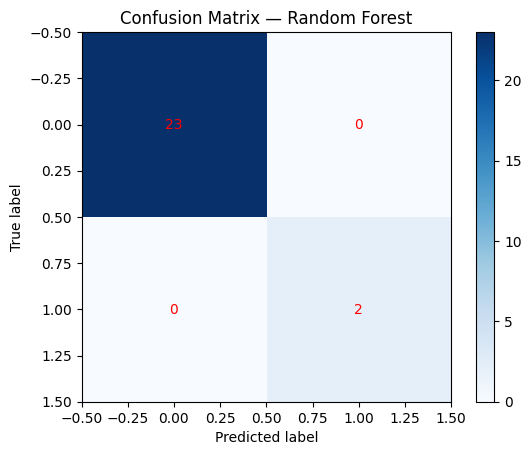

In [22]:
# Confusion Matrix for RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure()
plt.imshow(cm_rf, interpolation='nearest', cmap="Blues")
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        plt.text(j, i, cm_rf[i, j], ha="center", va="center", color="red")
plt.show()

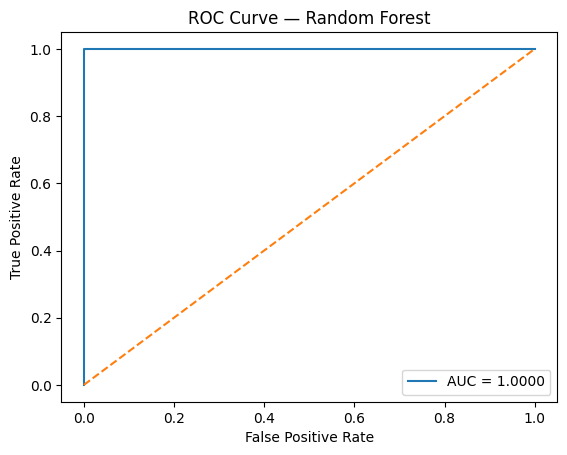

In [23]:
# ROC curve for RF
y_score_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_rf:.4f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC Curve — Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

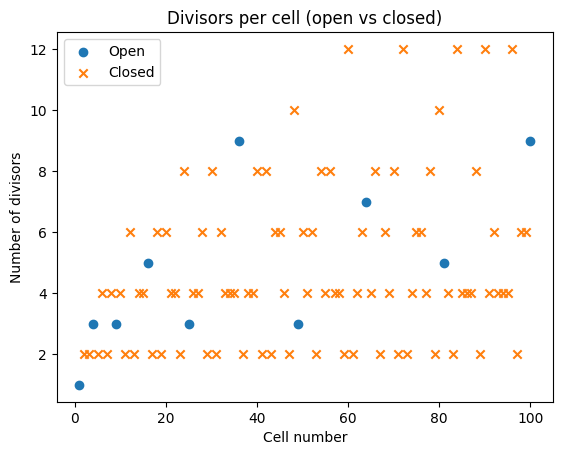

In [24]:
# Scatter plot of divisors vs cells
plt.figure()
open_cells = df[df["final_state"]==1]
closed_cells = df[df["final_state"]==0]
plt.scatter(open_cells["cell"], open_cells["num_divisors"], marker='o', label="Open")
plt.scatter(closed_cells["cell"], closed_cells["num_divisors"], marker='x', label="Closed")
plt.title("Divisors per cell (open vs closed)")
plt.xlabel("Cell number")
plt.ylabel("Number of divisors")
plt.legend()
plt.show()

In [25]:
# Final results
print("\nFinal released cells (open):")
print(df[df["final_state"]==1]["cell"].tolist())
print("Total released:", df["final_state"].sum())


Final released cells (open):
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Total released: 10


**Quick answers**

**How many protesters are finally released?** — 10.

**Which cell numbers?** — the perfect squares between 1 and 100: [1, 4, 9, 16, 25, 36, 49, 64, 81, 100].

(Reason: a cell toggles once for every divisor of its cell-number; only numbers with an odd number of divisors — perfect squares — end up open.)